# Kaggle 필사 : Insurance prediction with five Regressor Models 

In [2]:
import os
os.getcwd()

'c:\\Users\\A\\Desktop\\EURON\\과제\\week10'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.shape

(1338, 7)

In [10]:
df.isnull().sum().sort_values(ascending= False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

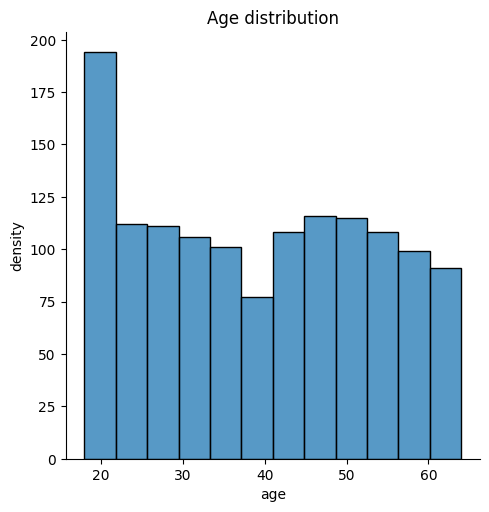

In [11]:
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

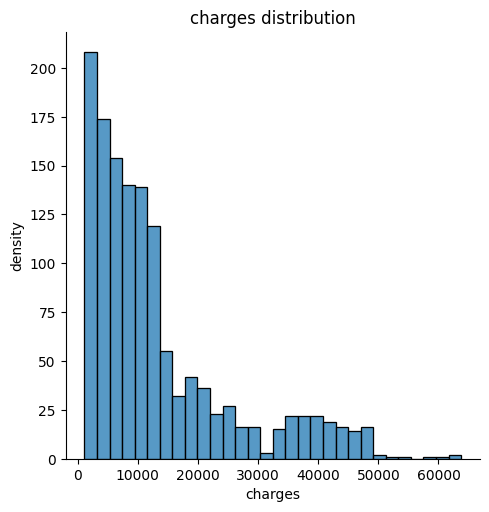

In [12]:
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

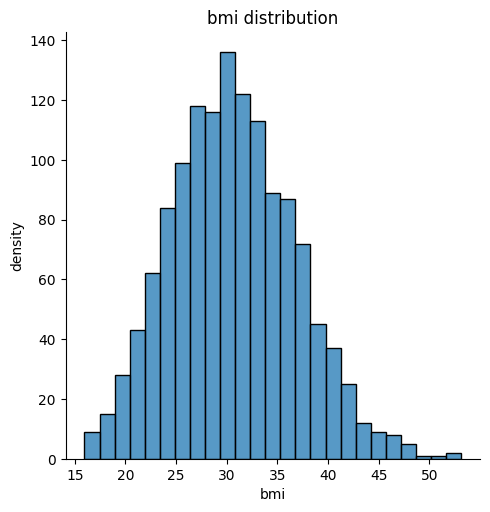

In [13]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

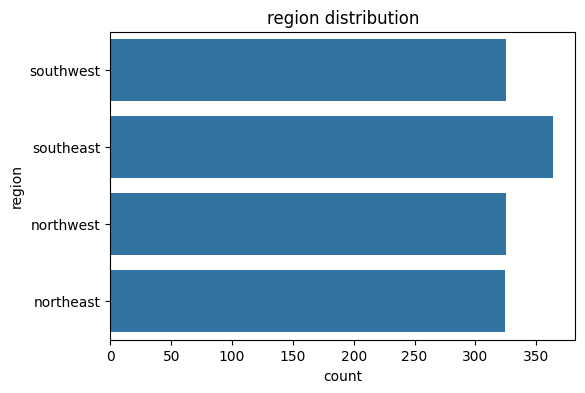

In [17]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('region distribution')
plt.show()


In [18]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

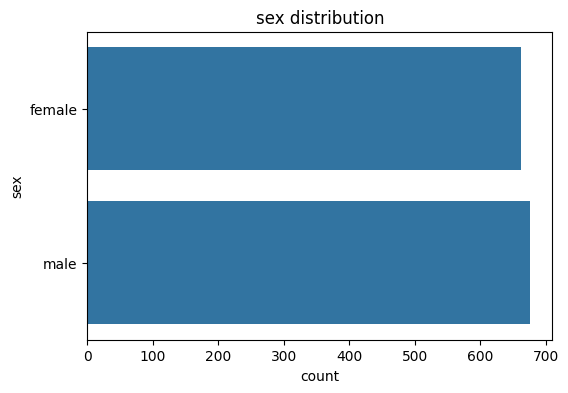

In [19]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
plt.title('sex distribution')
plt.show()

In [20]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

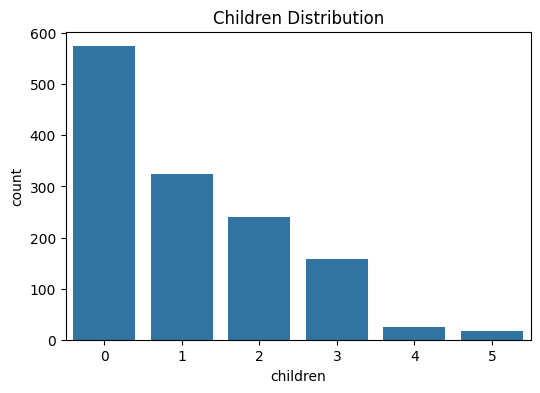

In [24]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()


In [23]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

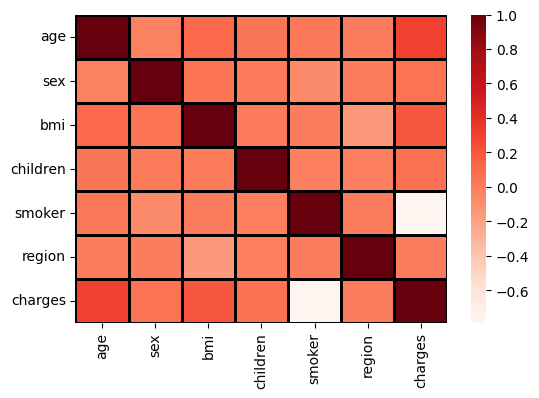

In [25]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

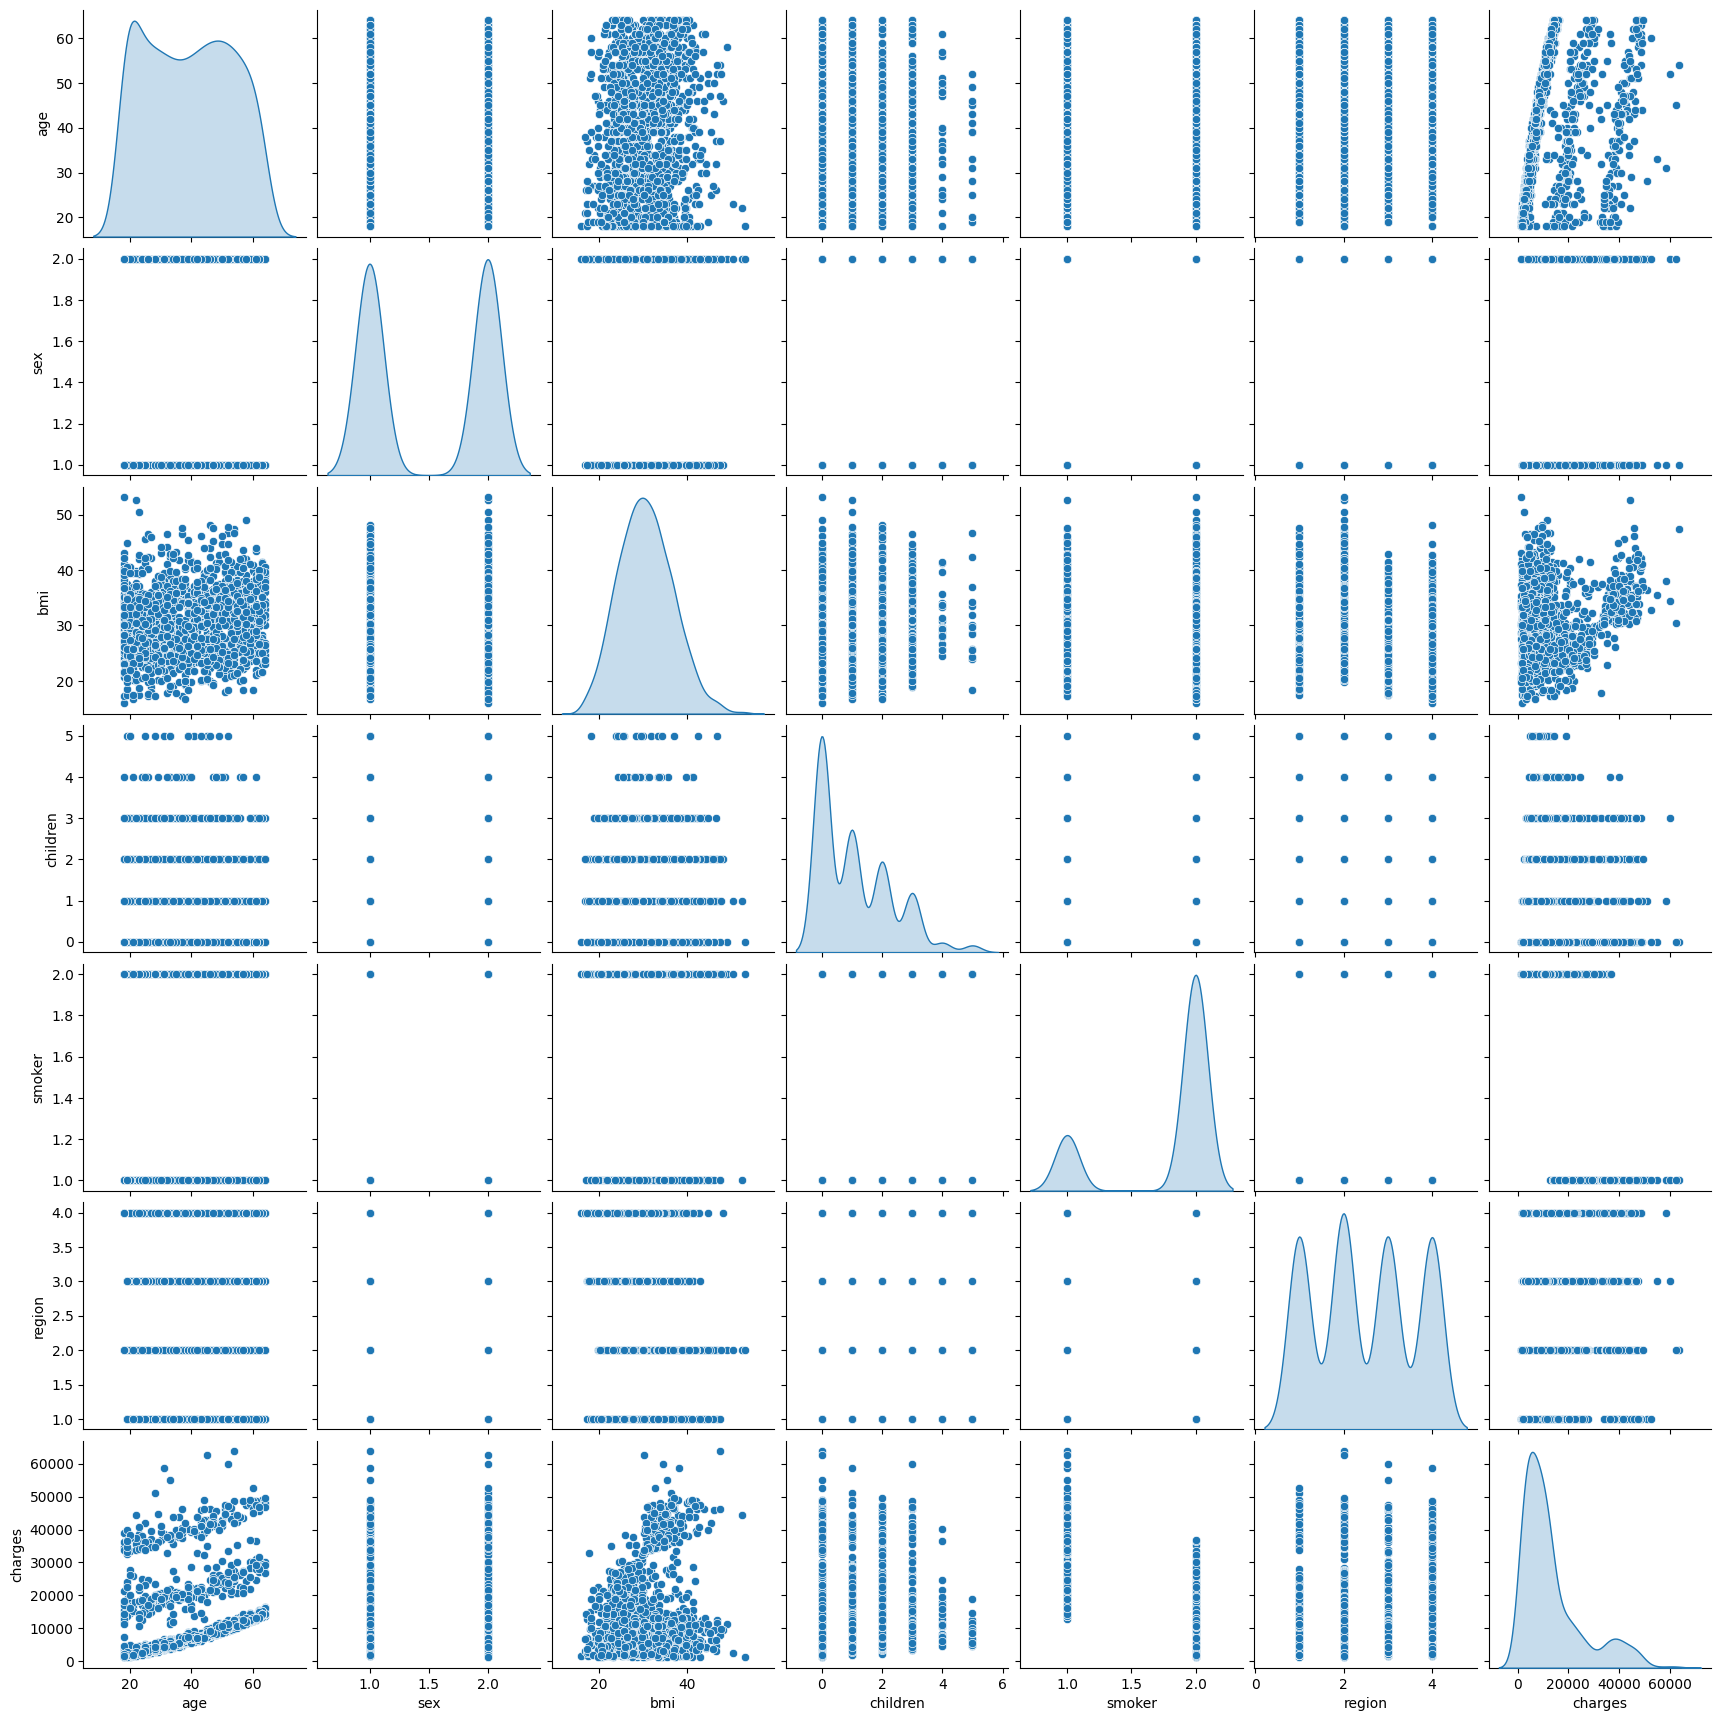

In [29]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde')
plt.show()

In [30]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [32]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,3.990250e+03
MSE_li_reg,3.353013e+07
RMSE_li_reg,5.790521e+03


In [34]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88791389 0.85653048 0.84404195 0.87198372 0.84417492]


In [35]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7613126015198816

In [36]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [37]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.528851e+03
MSE_gradient,2.110725e+07
RMSE_gradient,4.594262e+03


In [38]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94591678 0.91465976 0.9168015  0.92291933 0.91717029]


In [39]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.849746079970233

In [40]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,3.142590e+03
MSE_XGB,2.976529e+07
RMSE_XGB,5.455757e+03


In [42]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.91782241 0.88730325 0.90410079 0.90440364 0.88383429]


In [43]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.7881129907007072

In [44]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [45]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.371181e+03
MSE_tree_reg,4.757140e+07
RMSE_tree_reg,6.897203e+03


In [46]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.84603139 0.81312774 0.83518215 0.86097011 0.83791496]


In [47]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6613584742125754

In [48]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.916493e+03
MSE_forest_reg,2.542738e+07
RMSE_forest_reg,5.042557e+03


In [50]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94112412 0.90184043 0.92063351 0.91381061 0.90391005]


In [51]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8189927868384318

# Kaggle 필사 : Avocado Price Regression w/ PyCaret & EDA 

In [59]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install jinja2

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.9.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached kaleido-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached plotly_resampler-0.11.0-py3-none-any.whl.metadata (13 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached category_encod

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\A\\miniconda3\\envs\\terminator\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



  Using cached MarkupSafe-2.0.1-cp311-cp311-win_amd64.whl
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 3.1.2 requires markupsafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
werkzeug 3.1.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [66]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
ds = pd.read_csv('../input/avocado-prices/avocado.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

In [ ]:
# --- Print Dataset Info ---
print('\033[92m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[92m*' * 30+'\033[0m')
print('Total Rows:'+'\033[92m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[92m\033[1m', ds.shape[1])
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[92m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
ds.info(memory_usage = False)

In [ ]:
# --- Colors and Labels (Null Values Dropped) ---
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11)
plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)